In [7]:
import sys, shutil

In [16]:
from ScatterSim.NanoObjects import SphereNanoObject, PolydisperseNanoObject
# We'll import a few lattices, cubic, FCC, BCC and Diamond
from ScatterSim.LatticeObjects import SimpleCubic, FCCLattice, BCCLattice, DiamondTwoParticleLattice
# import the peak shape for the peaks, tunable
from ScatterSim.PeakShape import PeakShape
from ScatterSim.Scattering import *

import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook


<IPython.core.display.Javascript object>


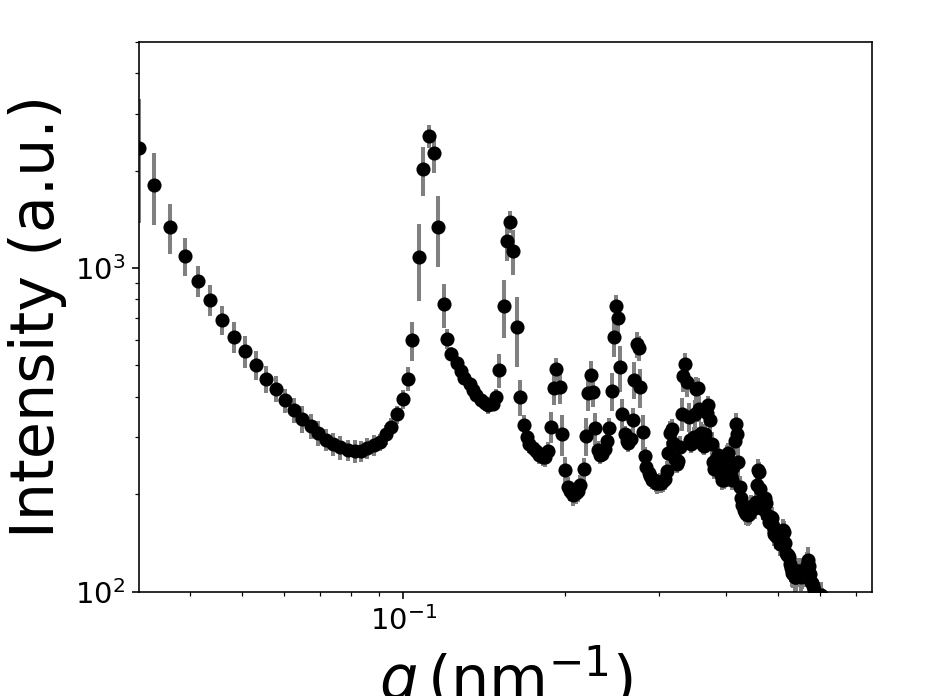

In [12]:
ptype = 'structure_factor'
area_of_interest = [0.0,1.2,0,2.5]

plot_data = True


data_dir = './data_ye/'
data_file = 'simple cubic.txt'


d = ExperimentalData1D()
d.load_intensity_txt( data_dir+data_file, skiprows=1, subtract_minimum=True )
d.set_structure_factor_asymptote( 0.75, 0.82 )

g= d.plot(scaling=[0.0,0.75,1e2,5e3],xlog=True, ylog=True)
#[0.0,1.4,5e-6,5e-5]


<IPython.core.display.Javascript object>


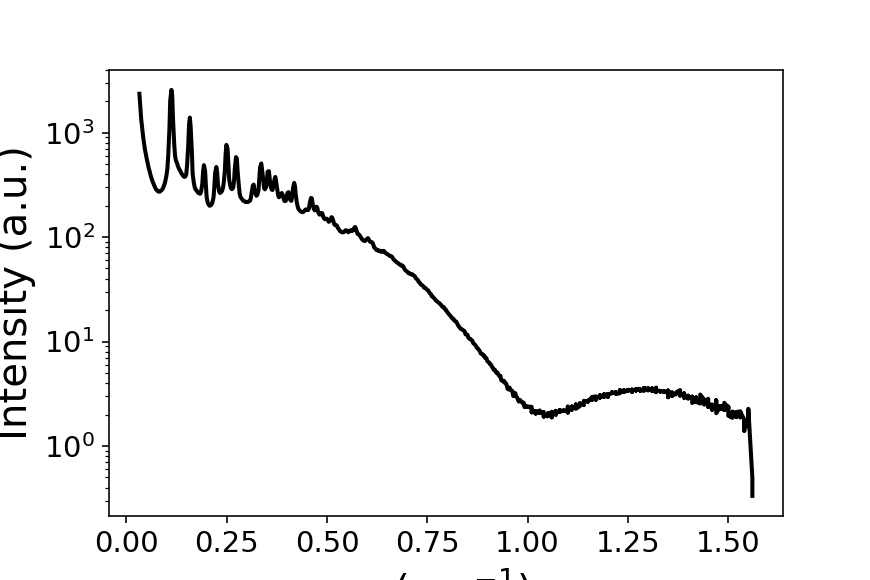

In [11]:
#removes tail in the code version

plt.figure(0, figsize=(6,4));plt.clf()
q_list = d.q_vals
int_list = d.intensity_vals
plt.semilogy( q_list, int_list, color=(0,0,0), linewidth=2.0, )
plt.xlabel( r'$q \, (\mathrm{nm}^{-1})$', size=20 )
plt.ylabel( 'Intensity (a.u.)', size=20 )   



In [13]:
len(q_list)

656

In [1]:
q = np.linspace(0.032, 1.56, 656)
peak = PeakShape(delta=0.01, nu=0.01) 
lattice_spacing = 55.

pargs_sphere = {'radius' : 10.0}
sphere = SphereNanoObject(pargs_sphere)


sq_sphere= sphere.form_factor_squared_isotropic(q)

NameError: name 'np' is not defined

In [18]:
lat_SC = SimpleCubic([sphere], lattice_spacing_a=lattice_spacing)
Iq_SC = lat_SC.intensity(q, peak)
Sq_SC = lat_SC.structure_factor_isotropic(q, peak)
print("Finished calculating Simpple Cubic")

Finished calculating Simpple Cubic


<IPython.core.display.Javascript object>


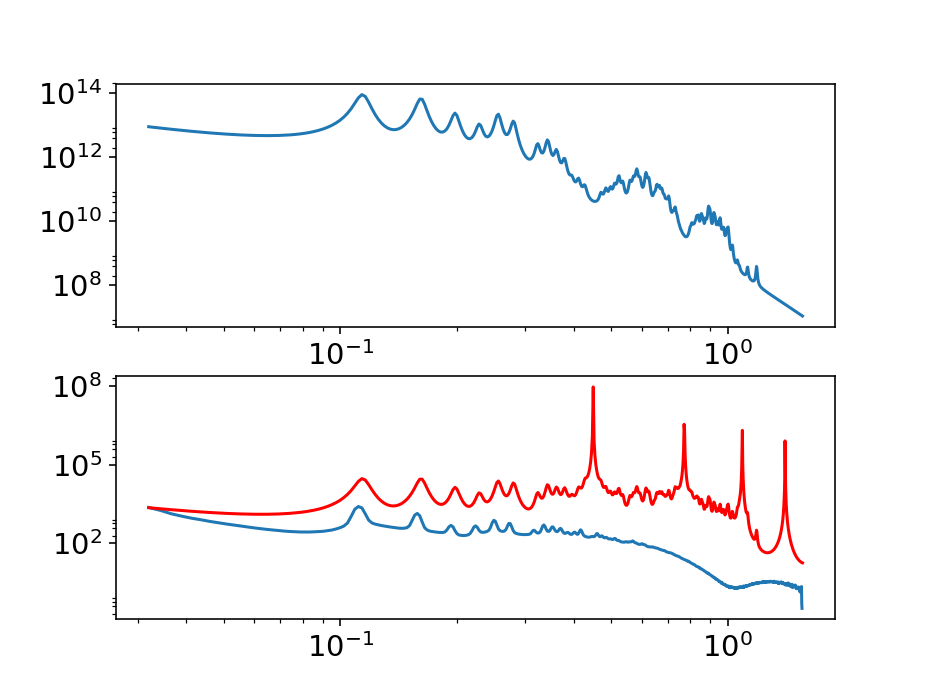

In [19]:
plt.figure(2);
plt.clf()
plt.title("Simple Cubic Intensity")
plt.subplot(2,1,1)
plt.loglog(q, Iq_SC)

plt.subplot(2,1,2)
plt.loglog(q,int_list)
plt.loglog(q,Sq_SC,'red')

## Fitting the Data with the Code

## Polydisperse Simple Cubic Lattice

In [20]:
sigma_D = .06

pargs_polysphere = dict(radius= 7, sigma_R=.05)

polysphere = PolydisperseNanoObject(SphereNanoObject, pargs_polysphere, argname='radius', argstdname='sigma_R')

sq_polysphere = polysphere.form_factor_squared_isotropic(q)

lat_SC_poly = SimpleCubic([polysphere], lattice_spacing_a=lattice_spacing, sigma_D=sigma_D)
Iq_SC_poly = lat_SC_poly.intensity(q, peak)
Sq_SC_poly = lat_SC_poly.structure_factor_isotropic(q, peak)
print("Finished calculating Simple Cubic polysphere")



Finished calculating Simple Cubic polysphere


<IPython.core.display.Javascript object>


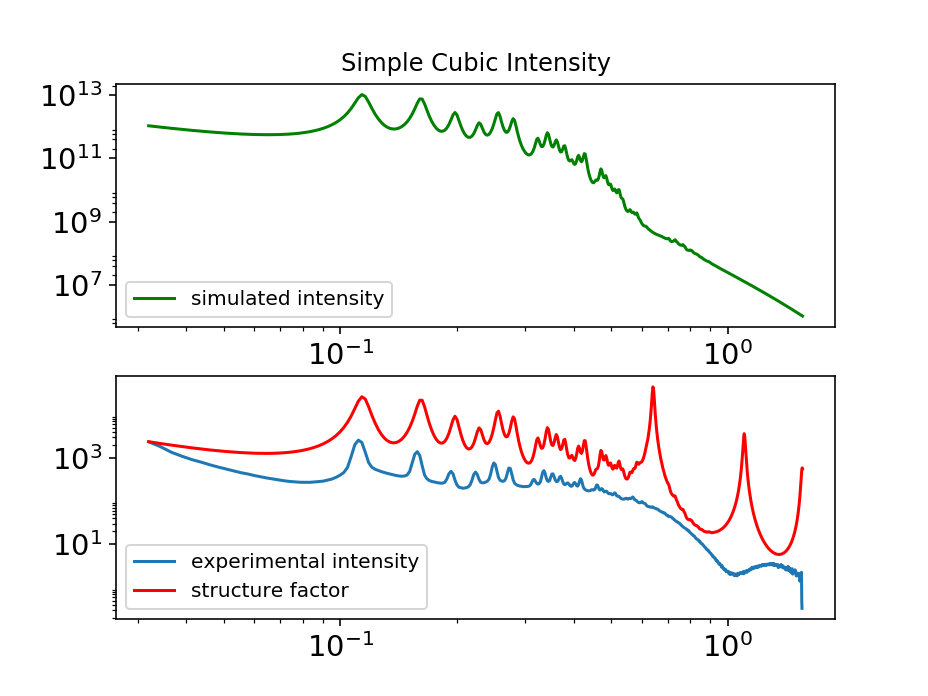

In [21]:
plt.figure(3);
plt.clf()

plt.subplot(2,1,1)
plt.title("Simple Cubic Intensity")
plt.loglog(q, Iq_SC_poly, 'green', label='simulated intensity')
plt.legend(loc='lower left')

plt.subplot(2,1,2)
plt.loglog(q,int_list, label='experimental intensity')
plt.loglog(q,Sq_SC_poly,'red', label='structure factor')
plt.legend(loc='lower left')

In [ ]:
#https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.basinhopping.html